# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city- need to request "metric" to retrieve C values.
    city_url = url + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | vorgashor
Processing Record 7 of Set 1 | afaahiti
Processing Record 8 of Set 1 | maturin
Processing Record 9 of Set 1 | safford
Processing Record 10 of Set 1 | llerena
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | namsos
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | buala
Processing Record 21 of Set 1 | juneau
Processing Record 22 of Set 1 | saldanha
Processi

Processing Record 40 of Set 4 | kilinochchi
Processing Record 41 of Set 4 | mbala
Processing Record 42 of Set 4 | carrigaline
Processing Record 43 of Set 4 | kavaratti
Processing Record 44 of Set 4 | ilha de mocambique
Processing Record 45 of Set 4 | mount gambier
Processing Record 46 of Set 4 | khovd
Processing Record 47 of Set 4 | san agustin de valle fertil
Processing Record 48 of Set 4 | sinop
Processing Record 49 of Set 4 | nikol'sk
Processing Record 0 of Set 5 | sanford
Processing Record 1 of Set 5 | severo-yeniseyskiy
Processing Record 2 of Set 5 | mana
Processing Record 3 of Set 5 | villa gesell
Processing Record 4 of Set 5 | mooresville
Processing Record 5 of Set 5 | stephenville
Processing Record 6 of Set 5 | sao joao da barra
Processing Record 7 of Set 5 | vila franca do campo
Processing Record 8 of Set 5 | shakawe
Processing Record 9 of Set 5 | touros
Processing Record 10 of Set 5 | mata-utu
Processing Record 11 of Set 5 | greymouth
Processing Record 12 of Set 5 | buka
Proc

City not found. Skipping...
Processing Record 30 of Set 8 | huarmey
Processing Record 31 of Set 8 | akureyri
Processing Record 32 of Set 8 | tolanaro
Processing Record 33 of Set 8 | port saint john's
Processing Record 34 of Set 8 | rongelap
Processing Record 35 of Set 8 | neftcala
Processing Record 36 of Set 8 | aden
Processing Record 37 of Set 8 | dickinson
Processing Record 38 of Set 8 | campoverde
Processing Record 39 of Set 8 | mangrol
Processing Record 40 of Set 8 | ulanhot
Processing Record 41 of Set 8 | tipitapa
Processing Record 42 of Set 8 | malango
Processing Record 43 of Set 8 | visakhapatnam
Processing Record 44 of Set 8 | seven pagodas
Processing Record 45 of Set 8 | queenstown
Processing Record 46 of Set 8 | homer
Processing Record 47 of Set 8 | yeppoon
Processing Record 48 of Set 8 | buenaventura
Processing Record 49 of Set 8 | lethem
Processing Record 0 of Set 9 | berdigestyakh
Processing Record 1 of Set 9 | visby
Processing Record 2 of Set 9 | hasaki
Processing Record 

Processing Record 22 of Set 12 | lakatoro
Processing Record 23 of Set 12 | lospalos
Processing Record 24 of Set 12 | aktau
Processing Record 25 of Set 12 | teluknaga
Processing Record 26 of Set 12 | taksimo
Processing Record 27 of Set 12 | maloye ganyushkino
Processing Record 28 of Set 12 | nyandoma
Processing Record 29 of Set 12 | menaka
Processing Record 30 of Set 12 | charlottetown
Processing Record 31 of Set 12 | valdovino
Processing Record 32 of Set 12 | lawas
Processing Record 33 of Set 12 | dungannon
Processing Record 34 of Set 12 | koulikoro
Processing Record 35 of Set 12 | orchard homes
Processing Record 36 of Set 12 | serra talhada
Processing Record 37 of Set 12 | itamaraca
Processing Record 38 of Set 12 | pontes e lacerda
Processing Record 39 of Set 12 | yuzhno-kurilsk
Processing Record 40 of Set 12 | nicoya
Processing Record 41 of Set 12 | eaglehawk
Processing Record 42 of Set 12 | hirara
Processing Record 43 of Set 12 | kiunga
-----------------------------
Data Retrieval C

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,14.29,47,20,5.66,CA,1683683057
1,hilo,19.7297,-155.0900,26.27,83,100,3.09,US,1683682921
2,puerto natales,-51.7236,-72.4875,2.46,88,23,1.72,CL,1683682816
3,port alfred,-33.5906,26.8910,16.86,76,3,3.90,ZA,1683682840
4,vorgashor,67.5833,63.9500,-3.77,97,100,0.28,RU,1683682846


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,14.29,47,20,5.66,CA,1683683057
1,hilo,19.7297,-155.0900,26.27,83,100,3.09,US,1683682921
2,puerto natales,-51.7236,-72.4875,2.46,88,23,1.72,CL,1683682816
3,port alfred,-33.5906,26.8910,16.86,76,3,3.90,ZA,1683682840
4,vorgashor,67.5833,63.9500,-3.77,97,100,0.28,RU,1683682846


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

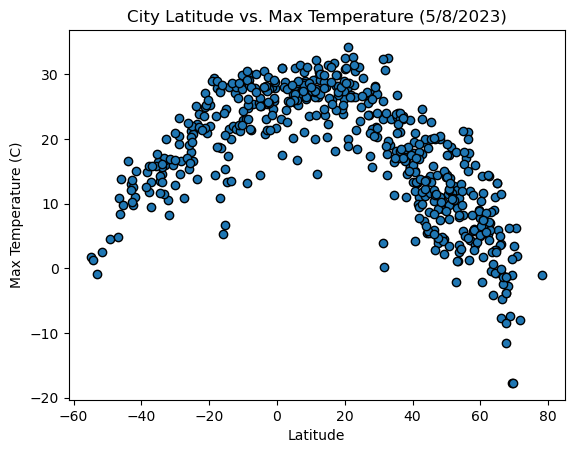

In [8]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (5/8/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# # Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()



#### Latitude Vs. Humidity

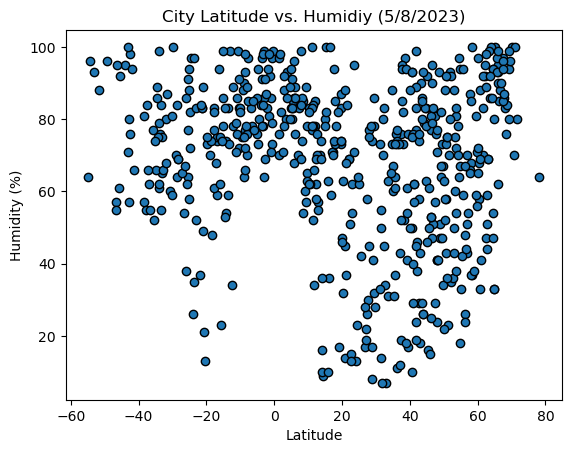

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
lat = city_data_df["Lat"]
temp = city_data_df["Humidity"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Humidiy (5/8/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

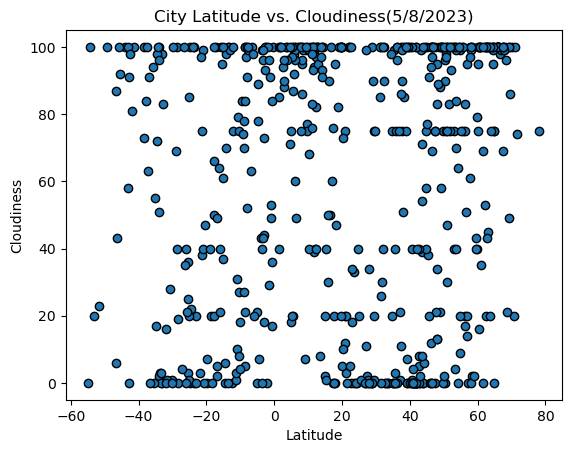

In [10]:
#Latitude vs. Cloudiness
lat = city_data_df["Lat"]
temp = city_data_df["Cloudiness"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(5/8/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

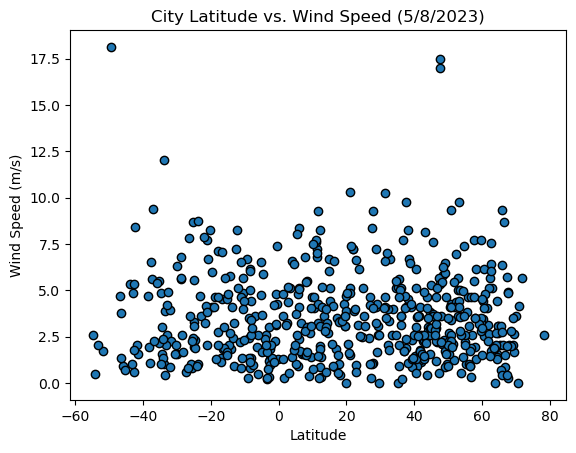

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
temp = city_data_df["Wind Speed"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (5/8/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# Requires input of x_values and y_values as well as annotation location 
#(may need adjusted when data is rerun if data points obscure text)

def linear_regression(x_values, y_values, x_annotate, y_annotate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    text = plt.annotate(line_eq,(x_annotate, y_annotate),fontsize=15,color="red")
    print(f'The r-value is {rvalue}')
    return

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,14.29,47,20,5.66,CA,1683683057
1,hilo,19.7297,-155.0900,26.27,83,100,3.09,US,1683682921
4,vorgashor,67.5833,63.9500,-3.77,97,100,0.28,RU,1683682846
6,maturin,9.7500,-63.1767,26.91,65,77,4.63,VE,1683682851
7,safford,32.8340,-109.7076,32.51,7,0,6.69,US,1683683040


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,2.46,88,23,1.72,CL,1683682816
3,port alfred,-33.5906,26.8910,16.86,76,3,3.90,ZA,1683682840
5,afaahiti,-17.7500,-149.2833,27.93,83,50,7.13,PF,1683682804
9,adamstown,-25.0660,-130.1015,21.75,58,85,5.53,PN,1683683059
10,carnarvon,-24.8667,113.6333,21.15,82,100,1.92,AU,1683682986


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8469067434382791


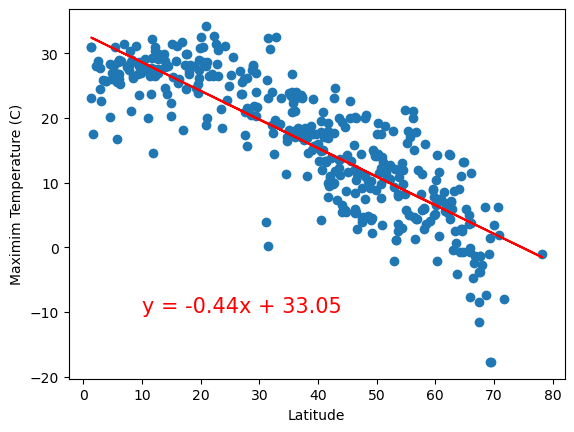

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_annotate = 10
y_annotate = -10


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Maximim Temperature (C)')


plt.show()

The r-value is 0.7844445124012779


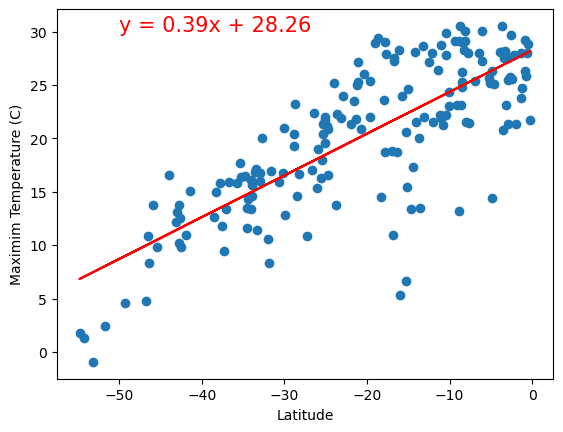

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_annotate = -50
y_annotate = 30


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Maximim Temperature (C)')
plt.show()

**Discussion about the linear relationship:** There is a clear correllation between temperature and proximity to the equator. In the chart describing the Northern Hemisphere, temperature decreases as distance from the equator and in the Southern Hemisphere, temperature increases as distance to the equator decreases. The high r-values of both plots suggest a strong correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.022257408689084258


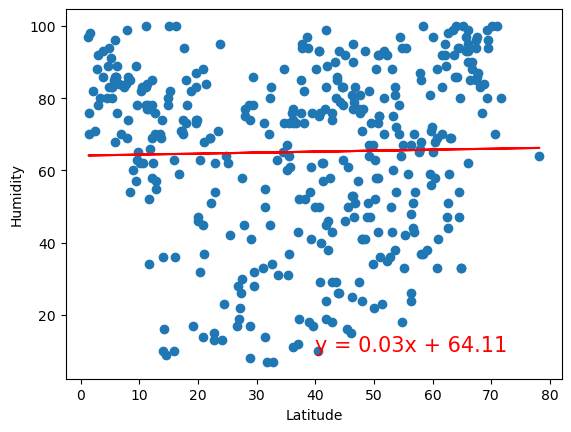

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_annotate = 40
y_annotate = 10


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is 0.1546604269606226


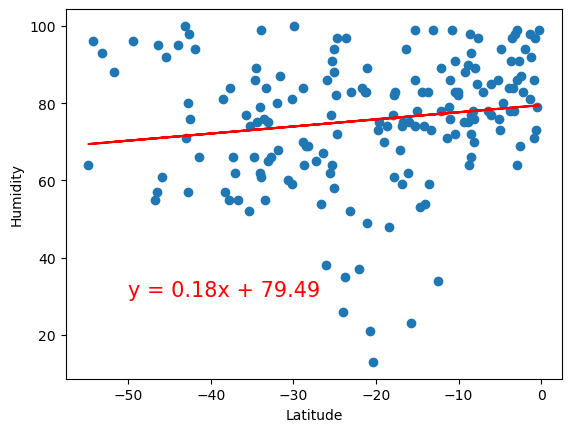

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_annotate = -50
y_annotate = 30


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** The r-values of both the Northern and Southern Hemisphere are low, suggesting that there is not a strong relationship between humidity and latitude. Furthermore, since both charts display a positive correlation, they do not trend towards each other at the equator, but rather humidity increases slightly in the Norther Hemisphere as distance from the equator increases and humidity decreases as distance from the equator increases in the Southern Hemisphere. This could point to larger seasonal trends, so it would be useful to look at data from at least a year before drawing any conclusions regarding humidity vs. latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.025245196570268004


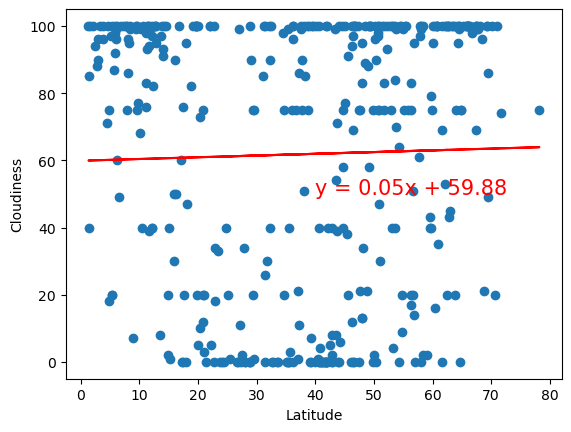

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_annotate = 40
y_annotate = 50


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is 0.02283220118179918


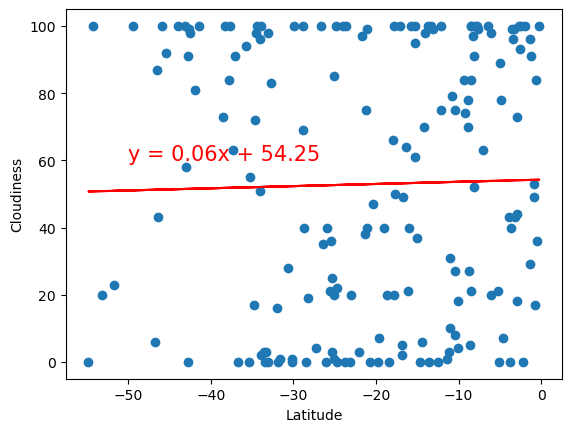

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_annotate = -50
y_annotate = 60


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** The plots of Latitude vs. Cloudiness are similar to those examining Humidity, with a low r-value for both, indicating a very weak connection between the variables. Also, as with humidity, both plots show a positive correlation, indicating that there is not a strong relationship between proximity to the equator and cloudiness, but that cloudiness increases (slightly) as one moves north. Again, this may be tied to larger seasonal weather trends.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.04255170832153654


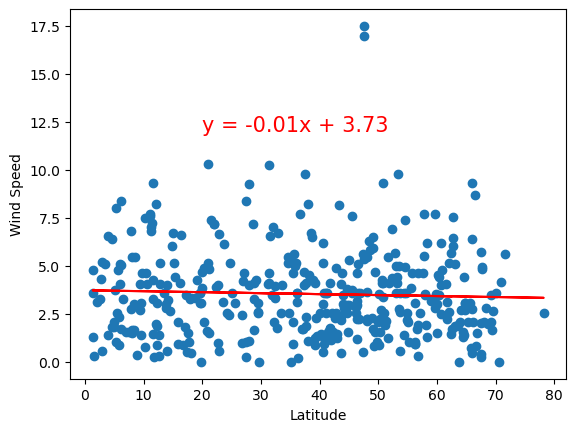

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_annotate = 20
y_annotate = 12


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is -0.10439018639681147


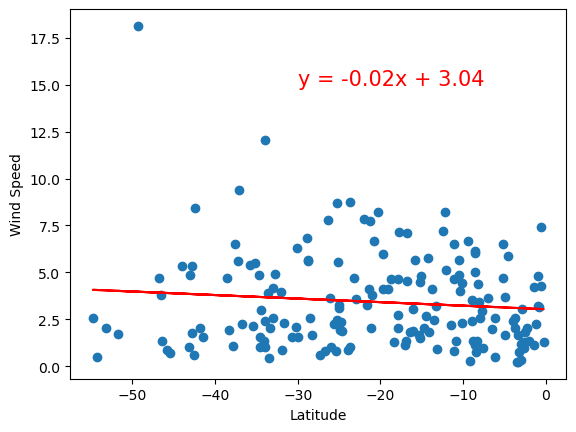

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_annotate = -30
y_annotate = 15


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** The 2 plots examining Wind Speed versus latitude have little in common. In the Norther Hemisphere, the r-value is almost 0, indicating that there is no relationship between the 2 variables. In the Southern Hemisphere, there is a small decrease in Wind Speed as distance to the equator decreases. With an r-value of .20, it is not enough of a relation to draw any conclusions from.

Overall, Temperature is the only one of the weather conditions examined that implies a strong relationship with Latitude. In both hemispheres, temperature increases as distance to the equator decreases.